In [1]:
from train import RSNA2024Stage2Dataset
import pandas as pd
import sys
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython import display
from glob import glob
import cv2
from tqdm.auto import tqdm
import pydicom
import h5py

In [2]:
train_coord_df = pd.read_csv("train_coord_df.csv")

In [3]:
# train_coord_df[train_coord_df.y_r_ax.isna()]

In [4]:
idx = 0

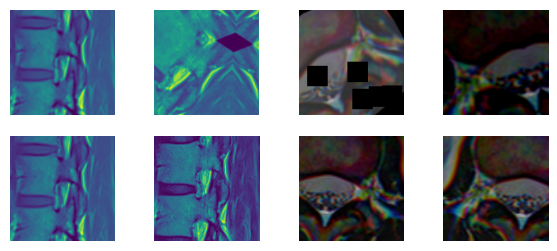

In [5]:
dataset = RSNA2024Stage2Dataset(
    df=train_coord_df,
    mode="train",
    crop_range_st1=1.0,
    crop_range_st2=1.0,
    img_size_ax=128,
    crop_range_ax=1.0,
    in_chans_ax=5
)

plt.figure(figsize=(9, 3))
plt.subplot(2, 5, 1)
plt.axis("off")
plt.imshow(dataset[idx]["volume_st1"][9])
# dataset[6]["volume_st1"].mean()
plt.subplot(2, 5, 2)
plt.axis("off")
plt.imshow(dataset[idx]["volume_st2"][9])
# dataset[6]["volume_st2"].mean()
plt.subplot(2, 5, 3)
plt.axis("off")
plt.imshow((dataset[idx]["volume_ax"][1:4].permute(1, 2, 0) * 255).numpy().astype(np.uint8))
# dataset[6]["volume_ax"].mean()
plt.subplot(2, 5, 4)
plt.axis("off")
plt.imshow((dataset[idx]["volume_ax"][6:9].permute(1, 2, 0) * 255).numpy().astype(np.uint8))
# dataset[6]["volume_ax"].mean()
# plt.subplot(2, 5, 5)
# plt.axis("off")
# plt.imshow((dataset[idx]["volume_ax"][11:14].permute(1, 2, 0) * 255).numpy().astype(np.uint8))
# dataset[6]["volume_ax"].mean()


dataset = RSNA2024Stage2Dataset(
    df=train_coord_df,
    mode="val",
    crop_range_st1=1.0,
    crop_range_st2=1.0,
    img_size_ax=128,
    crop_range_ax=1.0,
    in_chans_ax=5
)

# plt.figure(figsize=(9, 3))
plt.subplot(2, 5, 6)
plt.axis("off")
plt.imshow(dataset[idx]["volume_st1"][9])
# dataset[6]["volume_st1"].mean()
plt.subplot(2, 5, 7)
plt.axis("off")
plt.imshow(dataset[idx]["volume_st2"][9])
# dataset[6]["volume_st2"].mean()
plt.subplot(2, 5, 8)
plt.axis("off")
plt.imshow((dataset[idx]["volume_ax"][1:4].permute(1, 2, 0) * 255).numpy().astype(np.uint8))
# dataset[6]["volume_ax"].mean()
plt.subplot(2, 5, 9)
plt.axis("off")
plt.imshow((dataset[idx]["volume_ax"][6:9].permute(1, 2, 0) * 255).numpy().astype(np.uint8))
# dataset[6]["volume_ax"].mean()
# plt.subplot(2, 5, 10)
# plt.axis("off")
# plt.imshow((dataset[idx]["volume_ax"][11:14].permute(1, 2, 0) * 255).numpy().astype(np.uint8))
# dataset[6]["volume_ax"].mean()


idx += 1

In [8]:
dataset[idx]["volume_st1"].shape, dataset[idx]["pad_mask_st1"]

(torch.Size([20, 128, 128]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
         1., 1.]))